In [ ]:
import tensorflow_probability.substrates.jax.bijectors as tfb

from liesel_ptm.bspline.approx import equidistant_knots
from liesel_ptm.bspline.mispline import MiCoef, MiSpline

In [2]:
import jax
import jax.numpy as jnp
import pandas as pd
import plotnine as p9

In [ ]:
nparam = 10
knots = equidistant_knots(jnp.array([-4.0, 4.0]), n_param=nparam)

In [4]:
bs = MiSpline(knots, bijector=tfb.Softplus())

## Vector x, single coef

In [5]:
MiCoef(knots).zeros.shape

(10,)

In [ ]:
coef = jax.random.normal(jax.random.key(1), (nparam - 1))
bs.compute_coef(coef).shape

(10,)

(300,)
(300,)


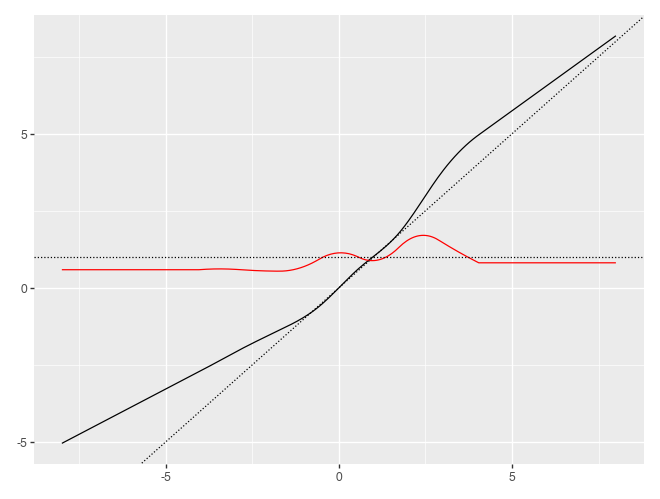

In [ ]:
x = jnp.linspace(-8.0, 8.0, 300)
coef = jax.random.normal(jax.random.key(1), (nparam - 1))


fx, fx_deriv = bs.dot_and_deriv(x, coef)

print(fx.shape)
print(fx_deriv.shape)

(
    p9.ggplot()
    + p9.geom_line(p9.aes(x, fx))
    + p9.geom_line(p9.aes(x, fx_deriv), color="red")
    + p9.geom_abline(linetype="dotted")
    + p9.geom_hline(p9.aes(yintercept=1.0), linetype="dotted")
)

## Continue linearly

(20, 300)
(20, 300)


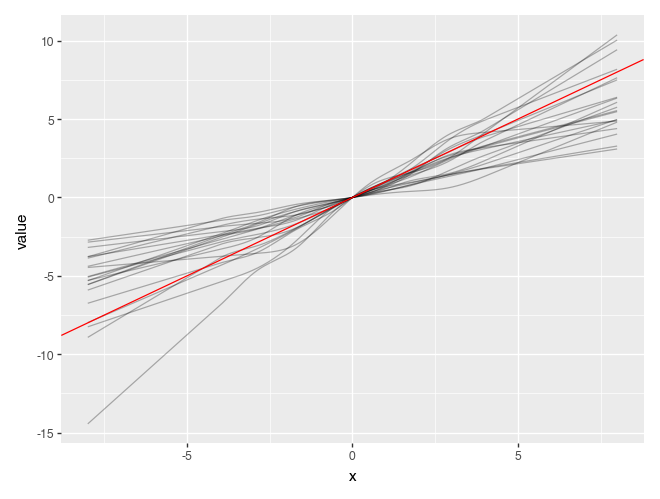

In [ ]:
x = jnp.linspace(-8.0, 8.0, 300)
coef = jax.random.normal(jax.random.key(1), (20, nparam - 1))
bs2 = MiSpline(knots, bijector=tfb.Softplus())
fx, fx_deriv = bs2.dot_and_deriv(x, coef)

print(fx.shape)
print(fx_deriv.shape)

df = pd.DataFrame(fx.T)
df["x"] = x
df = df.melt(id_vars="x")
df

(
    p9.ggplot(df)
    + p9.geom_line(p9.aes("x", "value", group="variable"), alpha=0.3)
    + p9.geom_abline(color="red")
)

## Vector x, batched coef

(20, 300)
(20, 300)


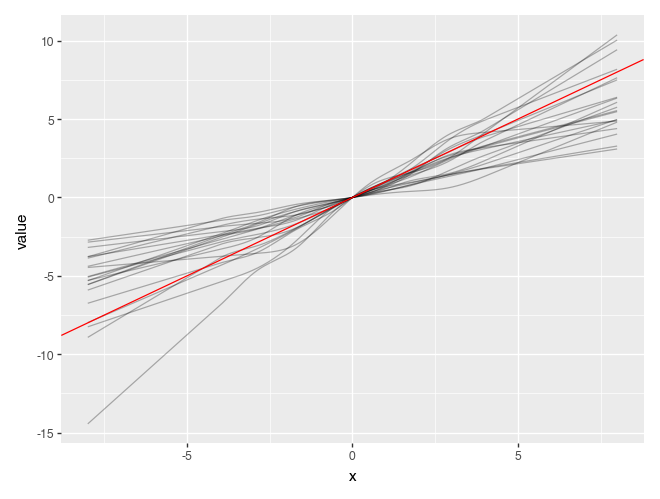

In [ ]:
x = jnp.linspace(-8.0, 8.0, 300)
coef = jax.random.normal(jax.random.key(1), (20, nparam - 1))
fx, fx_deriv = bs.dot_and_deriv(x, coef)

print(fx.shape)
print(fx_deriv.shape)

df = pd.DataFrame(fx.T)
df["x"] = x
df = df.melt(id_vars="x")
df


(
    p9.ggplot(df)
    + p9.geom_line(p9.aes("x", "value", group="variable"), alpha=0.3)
    + p9.geom_abline(color="red")
)

## Big batch (watch memory)

In [ ]:
n = 5000
c = 4
s = 1000
x = jax.random.uniform(jax.random.key(1), (c, s, n))

coef = jax.random.normal(jax.random.key(1), (c, s, nparam - 1))
fx, fx_deriv = bs.dot_and_deriv(x, coef)

fx.shape

(4, 1000, 5000)